In [37]:
# This script is for DNN
# Take Dataset3 NYC for example

## DNN Test

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch

# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [39]:
# Dataset3 NYC 70%
X_sociodemo_test_passed = pd.read_csv("../Data/04 Data for RF and DNN Optimal Parameters Search/02 70%_NYC_1000/X_sociodemo_train.csv", index_col = 'GEOID')
y = pd.read_csv("../Data/04 Data for RF and DNN Optimal Parameters Search/02 70%_NYC_1000/y_train.csv", index_col = 'GEOID', squeeze=True)

In [40]:
# Standardization function
def standarize_data(data, stats):
    return (data - stats['mean'])/ stats['std']

In [41]:
len(X_sociodemo_test_passed)

1396

In [42]:
# standardization
X_sociodemo_test_passed_stats = X_sociodemo_test_passed.describe().transpose()
X_sociodemo_std_test_passed = standarize_data(X_sociodemo_test_passed, X_sociodemo_test_passed_stats)

In [43]:
X_sociodemo_std_test_passed.head()

,% Black,% Ame Indi and AK Native,% Asian,% Nati Hawa and Paci Island,% Hispanic or Latino,% male,% married,% age 18-29,% age 30-39,% age 40-49,...,% age >=60,% <highschool,median income,% unemployment,% below poverty line,% food stamp/SNAP,median value units built,median year units built,% renter-occupied housing units,population density
GEOID,,,,,,,,,,,,,,,,,,,,,
36081040700,-0.662152,0.258345,-0.654920,-0.160797,3.063561,1.514689,-0.323095,-0.093181,0.937240,0.248727,...,-1.436757,2.525327,-0.558776,-0.723996,0.294705,0.826402,0.000335,-0.212170,1.050916,2.181183
36085030301,-0.412716,-0.142474,0.372373,-0.160797,0.240418,0.249860,0.559473,0.853589,-0.548866,0.207315,...,-0.120160,-0.464316,0.253063,-0.235766,-0.745044,-0.946040,-0.871737,1.906494,-1.174850,-0.892621
36081030600,2.040804,-0.370782,-0.671875,-0.160797,-0.876448,-0.485681,0.055781,-0.518836,0.082965,-0.469989,...,-0.102942,-0.245563,0.217864,-0.404853,-0.160724,-0.086560,-0.679664,0.564674,-1.063875,-1.168382
36081099705,-0.814426,-0.370782,1.722769,-0.160797,-0.705058,0.783289,1.083958,-0.314178,-1.059695,0.110887,...,0.653529,-0.904532,1.245957,-1.352133,-0.836788,-1.053352,-0.037460,2.188983,-1.346104,-1.405305
36081027400,1.922090,-0.370782,-0.643295,-0.160797,-0.969132,-3.033861,-1.131240,-0.769284,-0.560348,0.664621,...,0.203460,-0.346418,-0.085720,-0.420441,-0.700299,0.085884,-0.894972,0.988406,-1.699362,-0.593937


In [44]:
X_sociodemo_std_test_passed.shape

(1396, 21)

In [45]:
# Quick run before tuning hyperparameters
tf.random.set_seed(42)
# https://cnbeining.github.io/deep-learning-with-python-cn/4-advanced-multi-layer-perceptrons-and-keras/ch16-reduce-overfitting-with-dropout-regularization.html
dnn_model = keras.models.Sequential([
    keras.layers.Dense(256,activation="relu"), # Dense means fully connected.
    keras.layers.Dropout(0.2), # prevent overfitting
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(32,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

dnn_model.compile(optimizer="adam", loss=keras.losses.mean_squared_error, metrics=[keras.metrics.mean_squared_error])

In [46]:
history = dnn_model.fit(x=X_sociodemo_std_test_passed, y=y, validation_split=0.1, epochs=50, verbose=2)

Epoch 1/50
40/40 - 1s - loss: 353.6985 - mean_squared_error: 353.6985 - val_loss: 82.4881 - val_mean_squared_error: 82.4881 - 605ms/epoch - 15ms/step
Epoch 2/50
40/40 - 0s - loss: 53.1250 - mean_squared_error: 53.1250 - val_loss: 20.5500 - val_mean_squared_error: 20.5500 - 87ms/epoch - 2ms/step
Epoch 3/50
40/40 - 0s - loss: 35.9934 - mean_squared_error: 35.9934 - val_loss: 18.0147 - val_mean_squared_error: 18.0147 - 100ms/epoch - 2ms/step
Epoch 4/50
40/40 - 0s - loss: 30.2688 - mean_squared_error: 30.2688 - val_loss: 22.2463 - val_mean_squared_error: 22.2463 - 84ms/epoch - 2ms/step
Epoch 5/50
40/40 - 0s - loss: 26.5892 - mean_squared_error: 26.5892 - val_loss: 24.5472 - val_mean_squared_error: 24.5472 - 91ms/epoch - 2ms/step
Epoch 6/50
40/40 - 0s - loss: 21.7357 - mean_squared_error: 21.7357 - val_loss: 15.4121 - val_mean_squared_error: 15.4121 - 76ms/epoch - 2ms/step
Epoch 7/50
40/40 - 0s - loss: 19.7978 - mean_squared_error: 19.7978 - val_loss: 13.1056 - val_mean_squared_error: 13.10

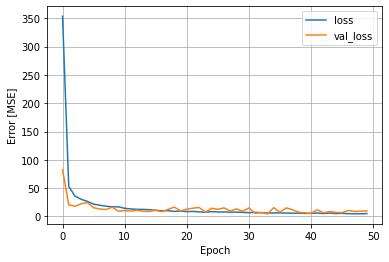

In [47]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MSE]')
plt.legend()
plt.grid(True)

In [48]:
#make prediction
y_pred = dnn_model.predict(X_sociodemo_std_test_passed)

#evaluate with groud truth
y_pred_r2 = r2_score(y, y_pred)
y_pred_rsme = mean_squared_error(y, y_pred, squared=False)

print(y_pred_r2)
print(y_pred_rsme)

0.8020259507858186
2.58409972303348


## Hyperparameter tuning

In [51]:
import os

In [52]:
def build_model(hp):
    model = keras.models.Sequential()
    
    for i in range(hp.Int("num_layer",1,10)):
        model.add(keras.layers.Dense(units=hp.Int("neuron_"+str(i),16,256, step=16), activation="relu"))
        
        for j in range(hp.Int("num_drop_layer_"+str(i),0,1)):
            model.add(keras.layers.Dropout(0.2))
            
    model.add(keras.layers.Dense(1))
    
    model.compile(optimizer="adam",loss=keras.losses.mean_absolute_error, metrics=[keras.metrics.mean_squared_error])
    
    return model

tuner = RandomSearch(build_model, objective="val_loss", max_trials=50, executions_per_trial=5 ,seed=42, overwrite=True, directory=os.path.normpath('C:/Users/yhu42/yhu42/hyper'))
# Integer, the total number of trials (model configurations) to test at most. Note that the oracle may interrupt the search before `max_trial` models have been tested if the search space has been exhausted. Defaults to 10.
# The number of models that should be built and fit for each trial.

In [53]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_layer (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 1, 'sampling': None}
neuron_0 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 16, 'sampling': None}
num_drop_layer_0 (Int)
{'default': None, 'conditions': [], 'min_value': 0, 'max_value': 1, 'step': 1, 'sampling': None}


In [54]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
tuner.search(X_sociodemo_std_test_passed, y, validation_split=0.1, epochs=50,  callbacks=[early_stop], verbose=2) #,

Trial 50 Complete [00h 00m 16s]
val_loss: 1.443242621421814

Best val_loss So Far: 1.3510819673538208
Total elapsed time: 00h 14m 49s
INFO:tensorflow:Oracle triggered exit


In [55]:
tuner.results_summary()

Results summary
Results in C:\Users\yhu42\yhu42\hyper\untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
num_layer: 5
neuron_0: 176
num_drop_layer_0: 1
neuron_1: 208
num_drop_layer_1: 0
neuron_2: 64
num_drop_layer_2: 0
neuron_3: 208
num_drop_layer_3: 0
neuron_4: 208
num_drop_layer_4: 0
neuron_5: 240
num_drop_layer_5: 0
neuron_6: 160
num_drop_layer_6: 0
neuron_7: 176
num_drop_layer_7: 0
neuron_8: 96
num_drop_layer_8: 1
neuron_9: 112
num_drop_layer_9: 0
Score: 1.3510819673538208
Trial summary
Hyperparameters:
num_layer: 9
neuron_0: 160
num_drop_layer_0: 0
neuron_1: 208
num_drop_layer_1: 1
neuron_2: 160
num_drop_layer_2: 0
neuron_3: 160
num_drop_layer_3: 0
neuron_4: 256
num_drop_layer_4: 0
neuron_5: 32
num_drop_layer_5: 0
neuron_6: 240
num_drop_layer_6: 0
neuron_7: 96
num_drop_layer_7: 0
neuron_8: 208
num_drop_layer_8: 0
neuron_9: 32
num_drop_layer_9: 0
Score: 1.404615092277527
Trial summary
Hyperparameters:
num_layer: 2
neur

In [56]:
best_hps = tuner.get_best_hyperparameters()[0]
layer_count = best_hps.get("num_layer")
print("The number of layer is: "+ str(layer_count))
for i in range(layer_count):
  print("Neuron for layer_"+str(i)+" is: "+str(best_hps.get("neuron_"+str(i))))
  print("Dropout for layer_"+str(i)+" is: "+str(best_hps.get("num_drop_layer_"+str(i))))

The number of layer is: 5
Neuron for layer_0 is: 176
Dropout for layer_0 is: 1
Neuron for layer_1 is: 208
Dropout for layer_1 is: 0
Neuron for layer_2 is: 64
Dropout for layer_2 is: 0
Neuron for layer_3 is: 208
Dropout for layer_3 is: 0
Neuron for layer_4 is: 208
Dropout for layer_4 is: 0


In [57]:
# Quick run on tuned hyperparameters
tf.random.set_seed(42)
dnn_model = keras.models.Sequential([
    keras.layers.Dense(176,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(208,activation="relu"),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(208,activation="relu"),
    keras.layers.Dense(208,activation="relu"),
    keras.layers.Dense(1)
])

dnn_model.compile(optimizer="adam", loss=keras.losses.mean_absolute_error, metrics=[keras.metrics.mean_squared_error])

In [20]:
# Quick run on tuned hyperparameters
tf.random.set_seed(42)
dnn_model = keras.models.Sequential([
    keras.layers.Dense(160,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(208,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(160,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(160,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(256,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(32,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(240,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(96,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(208,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

dnn_model.compile(optimizer="adam", loss=keras.losses.mean_squared_error, metrics=[keras.metrics.mean_squared_error])

In [58]:
history = dnn_model.fit(x=X_sociodemo_std_test_passed, y=y, validation_split=0.1, epochs=50, callbacks=[early_stop], verbose=0)

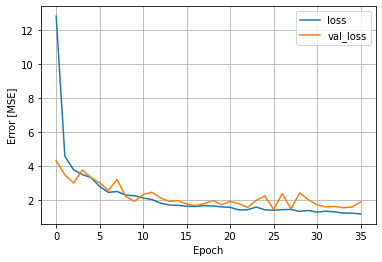

In [59]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MSE]')
plt.legend()
plt.grid(True)

In [60]:
#make prediction
y_pred = dnn_model.predict(X_sociodemo_std_test_passed)

#evaluate with groud truth
y_pred_r2 = r2_score(y, y_pred)
y_pred_rsme = mean_squared_error(y, y_pred, squared=False)

print(y_pred_r2)
print(y_pred_rsme)

0.9022650678597338
1.8156412642568696


In [61]:
#make prediction
y_pred = dnn_model.predict(X_sociodemo_std_test_passed)

#evaluate with groud truth
y_pred_r2 = r2_score(y, y_pred)
y_pred_rsme = mean_squared_error(y, y_pred, squared=False)

print(y_pred_r2)
print(y_pred_rsme)

0.9022650678597338
1.8156412642568696
